In [1]:
import json
from langdetect import detect
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re

In [2]:
with open("sweden_tweets.json", "r") as fp:
    sweden_tweets = json.load(fp)

with open("finland_tweets.json", "r") as fp:
    finland_tweets = json.load(fp)

In [3]:
# keep only tweets in English
sweden_tweets_en = [tweet for tweet in sweden_tweets if detect(tweet) == "en"]
finland_tweets_en = [tweet for tweet in finland_tweets if detect(tweet) == "en"]

print(f"{len(sweden_tweets_en)} out of {len(sweden_tweets)} tweets about sweden are in english, fraction: {len(sweden_tweets_en) / len(sweden_tweets)}")
print(f"{len(finland_tweets_en)} out of {len(finland_tweets)} tweets about finland are in english, fraction: {len(finland_tweets_en) / len(finland_tweets)}")

205 out of 225 tweets about sweden are in english, fraction: 0.9111111111111111
1052 out of 4037 tweets about finland are in english, fraction: 0.2605895466930889


In [4]:
# create corpi for the two text lists
sweden_corpus = " ".join(sweden_tweets_en)
# remove newlines
sweden_corpus = re.sub("\\n", " ", sweden_corpus)
# remove links
sweden_corpus = re.sub("https:\/\/t\.co\/[A-Za-z0-9]{3,}\s", " ", sweden_corpus)
# remove all nonalpha characters other than whitespace
sweden_corpus = re.sub("[^a-zA-Z\s]", "", sweden_corpus)
# make all words lowercase
sweden_corpus = sweden_corpus.lower()
# tokenize
sweden_corpus = sweden_corpus.split()
# remove stopwords
stopwords_sweden = nltk.corpus.stopwords.words("english")
# add custom stopwords
custom_stopwords_sweden = ["ukraine", "ukranian", "ukrainerussiawar", "ukrainewar", "ukrainian", "russia", "sweden", "swedish", "swedens"]
stopwords_sweden.extend(custom_stopwords_sweden)

sweden_corpus = [word for word in sweden_corpus if word not in stopwords_sweden]


# create corpi for the two text lists
finland_corpus = " ".join(finland_tweets_en)
# remove newlines
finland_corpus = re.sub("\\n", " ", finland_corpus)
# remove links
finland_corpus = re.sub("https:\/\/t\.co\/[A-Za-z0-9]{3,}\s", " ", finland_corpus)
# remove all nonalpha characters other than whitespace
finland_corpus = re.sub("[^a-zA-Z\s]", "", finland_corpus)
# make all words lowercase
finland_corpus = finland_corpus.lower()
# tokenize
finland_corpus = finland_corpus.split()
# remove stopwords
stopwords_finland = nltk.corpus.stopwords.words("english")
# add custom stopwords
custom_stopwords_finland = ["ukraine", "ukranian", "ukrainerussiawar", "ukrainewar", "ukrainian", "putin", "russia", "finland", "finnish", "finlands"]
stopwords_finland.extend(custom_stopwords_finland)
finland_corpus = [word for word in finland_corpus if word not in stopwords_finland]

In [5]:
# analyze word frequency
sweden_fd = nltk.FreqDist(sweden_corpus)
smc = sweden_fd.most_common(10)
print(
    f"most common words in sweden corpus: {smc}"
)


finland_fd = nltk.FreqDist(finland_corpus)
fmc = finland_fd.most_common(10)
print(
    f"most common words in finland corpus: {fmc}"
)

# POTENTIALLY EXCLUDE WORDS SUCH AS RUSSIA UKRAINE UKRAINEWAR UKRAINERUSSIAWAR ETC

most common words in sweden corpus: [('zelensky', 95), ('finland', 48), ('minister', 46), ('bakhmut', 41), ('norway', 40), ('germany', 39), ('jonson', 37), ('discussed', 36), ('aviation', 36), ('coalition', 36)]
most common words in finland corpus: [('zelensky', 1052), ('president', 511), ('meeting', 215), ('netherlands', 204), ('visit', 191), ('support', 168), ('usa', 161), ('prime', 156), ('nato', 145), ('volodymyr', 143)]


/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_56631/2157549109.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


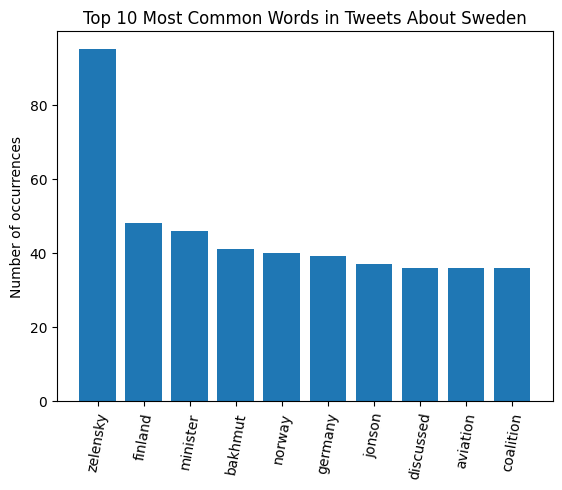

In [6]:
# SWEDEN MOST COMMON WORDS
fig, ax = plt.subplots()

words = [tup[0] for tup in smc]
counts = [tup[1] for tup in smc]

ax.bar(words, counts)

ax.set_ylabel('Number of occurrences')
ax.set_title('Top 10 Most Common Words in Tweets About Sweden')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.show()

/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_56631/2507806451.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


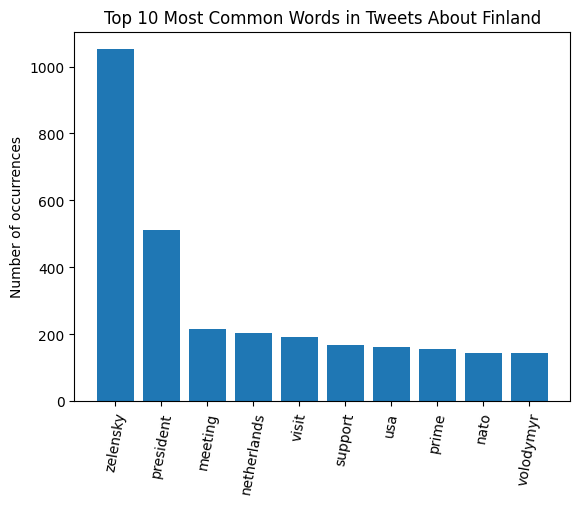

In [7]:
# FINLAND MOST COMMON WORDS
fig, ax = plt.subplots()

words = [tup[0] for tup in fmc]
counts = [tup[1] for tup in fmc]

ax.bar(words, counts)

ax.set_ylabel('Number of occurrences')
ax.set_title('Top 10 Most Common Words in Tweets About Finland')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.show()

In [8]:
# get the tweets individually and output their sentiment scores to a new dataframe, for the purpose of mean and median
def compute_sentiment(tweet, analyzer):
    """Given a tweet, compute its sentiment."""
    return analyzer.polarity_scores(tweet)

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compute_sentiment(sweden_tweets_en[9], sia)

{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.743}

In [10]:
# NOW, create a dataframe with columns :
# tweet, neg, neu, pos, compound

In [11]:
# for tweet in sweden_tweets_en[:20]:
#     sentiment = compute_sentiment(tweet, sia)
#     # add tweet to sentiment dict
#     row = list(sentiment.values())
#     row.insert(0, tweet)
#     row = pd.DataFrame(row, columns=["tweet", "neg", "neu", "pos", "compound"])
#     # add dict to dataframe
#     pd.concat(sweden_sentiment_df, row)

# print(sweden_sentiment_df)

sweden_sentiments = []

for tweet in sweden_tweets_en:
    sentiment = compute_sentiment(tweet, sia)
    # add tweet to sentiment dict
    row = list(sentiment.values())
    row.insert(0, tweet)

    sweden_sentiments.append(row)

sweden_sentiment_df = pd.DataFrame(sweden_sentiments, columns=["tweet", "neg", "neu", "pos", "compound"])


finland_sentiments = []

for tweet in finland_tweets_en:
    sentiment = compute_sentiment(tweet, sia)
    # add tweet to sentiment dict
    row = list(sentiment.values())
    row.insert(0, tweet)

    finland_sentiments.append(row)
    
finland_sentiment_df = pd.DataFrame(finland_sentiments, columns=["tweet", "neg", "neu", "pos", "compound"])

In [12]:
sweden_sentiment_mean = sweden_sentiment_df["compound"].mean()
sweden_sentiment_median = sweden_sentiment_df["compound"].median()
sweden_sentiment_std = sweden_sentiment_df["compound"].std()

finland_sentiment_mean = finland_sentiment_df["compound"].mean()
finland_sentiment_median = finland_sentiment_df["compound"].median()
finland_sentiment_std = finland_sentiment_df["compound"].std()

print(f"mean compound sentiment of sweden tweet: {sweden_sentiment_mean}")
print(f"standard deviation of compound sentiment of sweden tweet: {sweden_sentiment_std}")
print(f"median compound sentiment of sweden tweet: {sweden_sentiment_median}")

print(f"mean compound sentiment of finland tweet: {finland_sentiment_mean}")
print(f"standard deviation of compound sentiment of finland tweet: {finland_sentiment_std}")
print(f"median compound sentiment of finland tweet: {finland_sentiment_median}")

mean compound sentiment of sweden tweet: 0.015814146341463414
standard deviation of compound sentiment of sweden tweet: 0.3563352543257131
median compound sentiment of sweden tweet: 0.0
mean compound sentiment of finland tweet: 0.06216977186311786
standard deviation of compound sentiment of finland tweet: 0.49403139576225935
median compound sentiment of finland tweet: 0.0


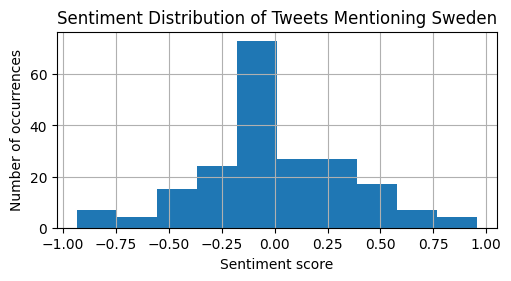

In [13]:
# SWEDEN

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(sweden_sentiment_df["compound"]), 10, facecolor='C0')

ax.set_xlabel('Sentiment score')
ax.set_ylabel('Number of occurrences')
ax.set_title('Sentiment Distribution of Tweets Mentioning Sweden')
# ax.text(75, .025, r'$\mu=0.012\ \sigma=0.36$')
# ax.axis([55, 175, 0, 0.03])
ax.grid(True)

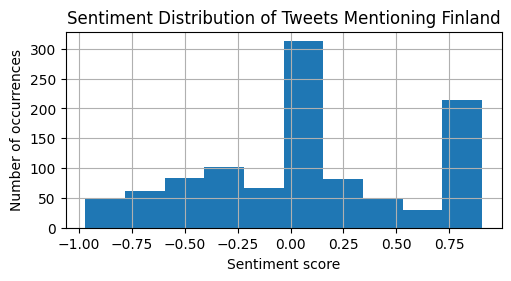

In [14]:
# FINLAND

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(finland_sentiment_df["compound"]), 10, facecolor='C0')

ax.set_xlabel('Sentiment score')
ax.set_ylabel('Number of occurrences')
ax.set_title('Sentiment Distribution of Tweets Mentioning Finland')
# ax.text(75, .025, r'$\mu=0.012\ \sigma=0.36$')
# ax.axis([55, 175, 0, 0.03])
ax.grid(True)